# Introduction to machine learning in scikit-learn

This is an introductory tutorial on machine learning using the scikit-learn Python package. Prerequisites are minimal; chiefly, I assume that the reader has a little bit of prior programming experience—preferably in Python. A passing familiarity with basic inferential statistical methods (primarily linear regression) is also helpful, but isn't essential.

This tutorial is adapted from a slightly different [tutorial on machine learning for psychologists](https://github.com/tyarkoni/ML4PS). That tutorial, in turn, borrowed heavily from a number of others—most notably, from Jake Vanderplas's excellent [scikit-learn tutorial](https://github.com/jakevdp/sklearn_tutorial). The main differences between the present tutorial and most others out there are that (a) this tutorial is more verbose than most (i.e., the emphasis is on conceptual understanding rather than just on learning the scikit-learn API), and (b) most of the examples are drawn from psychology and neuroscience (rather than general-interest or toy datasets).

### Overview and organization
This tutorial is organized into several [Jupyter notebooks](http://jupyter.org). A Jupyter notebook is a web application that lets you combine text (or HTML), code, figures, equations, interactive widgets, and more, all in one magical document. There are currently 6 notebooks in total; each one provides an introductory look at a different topic in machine learning. The coverage is by no means exhaustive; the goal is simply to provide a high-level overview of a number of key machine learning concepts and practices.

An important benefit of the Jupyter notebook format is that it's easy to interact with the code. To facilitate this, I've tried to put key parameters that you're encouraged to modify in constants (you'll recognize them by the fact that the variable names are all `UPPERCASE`) at the top of each cell. When you see something like `N = 30`, feel free to change it to `N = 300` and re-run the cell to see what effect it has on the generated plots or results. (Of course, you should feel free to modify the rest of the code as well!)

While most of the code is included in the tutorial notebooks themselves, in a few cases where the code is particularly long, I've abstracted it into helper functions in the `support/` folder. This is done to reduce clutter and increase clarity, but it goes without saying that you can always go and take a look at the supporting code if you want to see the details.

### Software
All of the code in this tutorial is written in Python. There is nothing intrinsically special about Python in the machine learning context; in principle, all of the examples and simulations in these notebooks could have been written in other languages (R, Matlab, etc.). Indeed, there are plenty of machine learning tutorials out there written in other languages.

That said, Python does have a number of practical advantages over other languages. Chief among these is the fact that it's currently the most widely used language in the data science and machine learning community. This means there are exceptional tools written in Python for virtually every domain of machine learning. Exhibit A is the [scikit-learn](https://scikit-learn.org/stable/) package for machine learning, which we'll rely on heavily throughout this tutorial. Scikit-learn is the world's most widely used machine learning, and some of the reasons for its popularity will hopefully soon become clear. Scikit-learn is itself built on the [numpy](https://www.numpy.org) numerical computing library, which we'll also use fairly regular.

If you're running these notebooks locally, you can find all of the dependencies in the `requirements.txt` file in the root of the [GitHub repository](https://github.com/neurohackademy/intro_sklearn). The easiest way to make sure they're all available for use is to install them with pip:

> pip install -r requirements.txt

### Data
To learn how to do machine learning in scikit-learn, we're going to need some data. To facilitate learning and experimentation, scikit-learn includes a [`datasets`](https://scikit-learn.org/stable/datasets/index.html) module containing a number of widely-used toy datasets. Although we're not going to use these datasets in the present tutorial, it's worth being aware of scikit-learn's built-in dataset-loading utilities. Here's how we could load the (in)famous [Iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set):

In [13]:
from sklearn import datasets

# Load a dictionary (technically, a Bunch) containing the data
iris = datasets.load_iris()

# 'data' and 'target' contains the feature data and classes, respectively
X, y = iris['data'], iris['target']

`X` contains feature information for 150 individual Iris flowers drawn from 3 different species. `y` contains the true class information for all flowers. If we want to inspect the features in a tabular form, we can easily load the data into a pandas `DataFrame`:

In [12]:
# Here we're importing the pandas package, which we'll use extensively
# for data manipulation. In future sections, we'll put the core imports
# at the top of the notebook, which is the convention in Python.
import pandas as pd

# Initialize a new pandas DataFrame from the X matrix and the feature names
data = pd.DataFrame(X, columns=iris['feature_names'])
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In principle, we could use the iris dataset (or one of the other datasets bundled with scikit-learn) for many of the examples we'll work through. But the iris dataset has some limitations—most notably, it's fairly small (only 150 rows and 4 features), and has nothing to do with neuroscience or psychology.

Instead, we'll use data that should be of interest to psychologists and many neuroscientists—namely, personality questionnaire data from [Johnson (2014)](http://www.personal.psu.edu/faculty/j/5/j5j/papers/JRP2014.pdf). The dataset consists of internet-based responses from over 300,000 people to a 300-item personality questionnaire—the IPIP representation of the NEO-PI-R. The NEO-PI-R is one of the most widely used measures of the Big Five. You've probably heard of the Big Five at least indirectly even if you're not a personality psychologist. If you've ever heard someone mumble something like "no I don't want to go out right now; don't you know I'm an introvert?", you're in the right ballpark. If you've worked with any of the larger public neuroimaging datasets (e.g., the Human Connectome Project, UK BioBank, etc.), there's a good chance you've come across, and possibly even used, self-report data very much like this.

The citation for the data, in case you end up wanting to use it for anything else, is:

> Johnson, J. A. (2014). Measuring thirty facets of the five factor model with a 120-item public domain inventory: Development of the IPIP-NEO-120. Journal of Research in Personality, 51, 78-89.

The original data is available in SPSS format [here](https://osf.io/wxvth/files/). But because SPSS is evil, I've taken the small liberty of bundling this repo with a plaintext, tab-delimited version of the file. This will make our life much easier when reading the data in. I've also taken the somewhat bigger liberty of dropping all rows that contain at least one missing response. Normally, [listwise deletion](https://en.wikipedia.org/wiki/Listwise_deletion) isn't a great thing to do, but our goal here is to introduce core machine learning principles, not to draw generalizable inferences about personality. So we're going to opt for expediency.

With that out of the way, let's read in and look at the data. We'll use [pandas](https://pandas.pydata.org/)—the reference data analysis library in Python—to do this. Pandas provides us with a fairly magical `read_csv` function that can read in almost any kind of tabular data. The dataset we're working with is pretty large (~145,000 rows), so expect this to take a few seconds.

In [15]:
# read_csv is a workhorse function that can read almost any kind of
# plain-text format. The returned object is a pandas DataFrame.
all_data = pd.read_csv('data/Johnson-2014-IPIP-300.tsv.gz', sep='\t')

### Representing the data

Once the data have been read in, we can take a look at the first few rows:

In [16]:
# head() display the first few rows of the dataset.
all_data.head()

,CASE,SEX,AGE,SEC,MIN,HOUR,DATE,MONTH,YEAR,COUNTRY,...,Self-Discipline,Self-Efficacy,Sympathy,Trust,Vulnerability,Neuroticism,Extraversion,Openness,Agreeableness,Conscientiousness
0,4,2,36,44,11,10,31,0,101,USA,...,4.2,5.0,4.0,4.1,1.1,1.483333,3.850000,4.300000,4.400000,4.48
1,6,1,17,28,23,10,31,0,101,UK,...,2.2,3.7,2.8,3.5,2.5,2.566667,3.566667,3.233333,3.000000,3.18
2,9,2,28,0,30,10,31,0,101,Denmark,...,2.7,4.2,4.0,4.7,1.9,2.283333,2.983333,4.350000,3.983333,3.32
3,11,1,17,36,36,10,31,0,101,Singapore,...,3.6,3.0,4.2,4.2,3.3,3.250000,2.416667,2.716667,4.200000,3.70
4,15,2,48,34,49,10,31,0,101,USA,...,3.9,4.0,4.4,3.1,3.2,3.416667,3.066667,3.566667,3.900000,4.20


As we can see, the data are tabular. Every row represents a different person, and every column represents a different variable. In machine learning terminology, we typically refer to the rows and columns as *samples* and *features*, respectively. We can thus think of our data as a two-dimensional *n* (samples) x *p* (features) matrix. The vast majority of algorithms implemented in the scikit-learn package expect to receive numerical matrices of this kind as their primary inputs. (Note that some of the columns in our dataset—e.g., "COUNTRY" and "MONTH"—contains strings or categorical values, so technically we'd need to recode these columns into a numerical form before we could make proper use of them.)

The original dataset consists of 310 columns: 10 demographic and contextual variables (sex, age, country, etc.) and 300 individual items, where each response is on a 5-point likert scale (reverse-keyed items have already been reversed). For example, here's the response distribution for the 100th item:

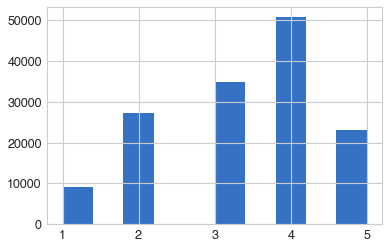

In [17]:
### tells the jupyter notebook to display plots in-line
%matplotlib inline

all_data['I100'].hist();

The cleaned-up version of the data I've provided here supplements the demographic and item variables with 30 facet score and 5 domains. The 30 facets are supposed to represent relatively narrow personality traits, where each facet score is obtained by averaging 10 of the 300 items. The facet scores, in turn, can be averaged (in groups of 6) to form the canonical Big Five constructs—Neuroticism, Extraversion, Openness, Agreeableness, and Conscientiousness.

#### Easier data retrieval
A lot of our analyses are going to make use of different subsets of the overall dataset. In particular, we'll frequently want to (a) sample subsets of rows, and (b) compare different sets of predictors (e.g., the 5 domains, 30 facets, and 300 individual items). To save ourselves from having to write the same subsetting code over and over, let's abstract it into a small helper function (in the other notebooks, we'll import the same function from our `support/` module).

In [18]:
def get_features(data, *args, n=None):
    ''' Return specified features or feature groups for a subsample.
    
    Args:
        data (DataFrame): DataFrame to subsample.
        args (list): Positional args containing the names of
            variables/groups to return. Each element must be one of
            'domains', 'facets', 'items', or the name of an existing
            column.
        n (int): Number of cases to return. If None, keeps all rows.

    Returns: A list of pandasDataFrames and/or Series, in the same
        order as *args.
    '''

    if n is not None:
        data = data.sample(n)

    results = []

    for name in args:
        if name == 'domains':
            results.append(data.iloc[:, -5:])
        elif name == 'facets':
            results.append(data.iloc[:, -35:-5])
        elif name == 'items':
            results.append(data.iloc[:, -335:-35])
        else:
            results.append(data[name])

    return results

For example, to get just the Big Five domain scores for 1000 random rows:

In [19]:
# Note that get_features() always returns a list, so when
# there's only a single requested object, we index with [0].
domains = get_features(all_data, 'domains', n=1000)[0]

# Display first few rows
domains.head()

,Neuroticism,Extraversion,Openness,Agreeableness,Conscientiousness
113387,2.900000,3.833333,4.050000,4.300000,3.38
40662,3.583333,3.500000,3.833333,2.933333,2.08
102336,2.216667,3.933333,3.533333,3.783333,3.72
43340,2.966667,3.316667,3.750000,3.150000,3.66
76678,2.316667,3.750000,3.383333,3.266667,3.34


Now we have some (numerical) matrices we can use to do machine learning! For the purposes of this tutorial, most of the predictive features we use (again, a "feature" is just machine learning-speak for "variable") will be personality scores of this kind—the 5 Big Five domains, 30 facets, or 300 individual items. Conventionally, we refer to the data matrix we're using to generate predictions as our `X` matrix.

#### A suitable outcome
The `X` matrix is, by itself, insufficient for prediction. Having some features we can use to make predictions is great, but we also need to know what we're trying to predict! Conventionally, the target of the prediction process is a vector of scores labeled `y`. In our case, the Johnson (2014) dataset includes a number of basic demographic variables. We'll mostly focus on age, which is a nice target for prediction, because (a) it's a numerical variable, and (b) we might intuitively expect there to be systematic relationships between people's age and their self-reported personality scores. Let's confirm this by looking at the zero-order correlation between each personality dimension and age:

In [21]:
# Get domain scores and age and assign to variables
X, y = get_features(all_data, 'domains', 'AGE')

# Pearson correlation between columns in X and y
X.corrwith(y).round(2)

Neuroticism         -0.12
Extraversion        -0.12
Openness             0.01
Agreeableness        0.16
Conscientiousness    0.25
dtype: float64

Four out of 5 of the Big Five dimensions are non-trivially correlated with age, and the relationship with conscientiousness is particularly robust.

Now that we've got our tools and data all set up, we're ready to start doing some machine learning.